In [2]:
from google.colab import files
uploaded = files.upload()

Saving One Plus 7 reviews.csv to One Plus 7 reviews.csv


In [5]:
import pandas as pd
df = pd.read_csv('One Plus 7 reviews.csv')

In [6]:
df

,Unnamed: 0,Customer Name,Rating,Review Title,User_Review
0,0,Shahzeb,5,Upgraded Beast In Old Package With Everything ...,I will divide my review in four sections first...
1,1,Alfa Xavier,5,Fastest Android device till date!!!,Pros: 1) Best processor - Lightning quick perf...
2,2,Jitendra Kumar,5,The Saviour of the Brand,The Saviour of the BrandIt is a known fact tha...
3,3,OneStepUp,5,Felt more of a lateral move than vertical. Goo...,I have been a loyal OP user for many years now...
4,4,Govinda Dasa,5,The Saviour of the Brand,It is a known fact that many people are disapp...
5,5,Captain Retail,5,An upgraded 6T and downgraded 7 PRO. Flagship ...,The media could not be loa...
6,6,Brendon Fernandes,5,Faster than light! (Update after one year),As someone who's admired the OnePlus series of...
7,7,Bhushan,5,Should you Buy OnePlus 7 or wait for Redmi K20...,"Bought OnePlus 7 (8 GB variant) in first sale,..."
8,8,Ganesh Hegde,5,Never Settle? Settle for this!,The media could not be loa...
9,9,Abhik Banerjee,5,OnePlus 7 review! Real flagship killer!,"Having used this device (OnePlus 7, 6-128 Gb) ..."


In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
import string
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
#stopwords = set(STOPWORDS)
my_stopwords = stopwords.words('english')

In [9]:
def clean_text(text):
  ps = PorterStemmer()
  #text = deEmojify(text) #to remove all emojies
  text_cleaned = "".join([x for x in text if x not in string.punctuation]) #to remove punc
  text_cleaned = re.sub(' +', ' ', text_cleaned) #to remove extra white spaces
  text_cleaned = text_cleaned.lower() #to change to lower
  tokens = text_cleaned.split(" ")
  tokens = [token for token in tokens if token not in my_stopwords] #taking only words which are not in stopwords
  text_cleaned = " ".join([ps.stem(token) for token in tokens])
  return text_cleaned

In [10]:
df['Clean_reviews'] = df['User_Review'].apply(clean_text)

In [11]:
df['Clean_reviews']

0    divid review four section first person experi ...
1    pro 1 best processor lightn quick perform even...
2    saviour brandit known fact mani peopl disappoi...
3    loyal op user mani year recent upgrad oneplu 6...
4    known fact mani peopl disappoint oneplu 7 pro ...
5     media could loaded\n \n\n\n\n i one plu 7 ult...
6    someon who admir oneplu seri phone age ive alw...
7    bought oneplu 7 8 gb variant first sale use 1 ...
8     media could loaded\n \n\n\n\n i dont want bor...
9    use devic oneplu 7 6128 gb well month pen thou...
Name: Clean_reviews, dtype: object

In [12]:
df

,Unnamed: 0,Customer Name,Rating,Review Title,User_Review,Clean_reviews
0,0,Shahzeb,5,Upgraded Beast In Old Package With Everything ...,I will divide my review in four sections first...,divid review four section first person experi ...
1,1,Alfa Xavier,5,Fastest Android device till date!!!,Pros: 1) Best processor - Lightning quick perf...,pro 1 best processor lightn quick perform even...
2,2,Jitendra Kumar,5,The Saviour of the Brand,The Saviour of the BrandIt is a known fact tha...,saviour brandit known fact mani peopl disappoi...
3,3,OneStepUp,5,Felt more of a lateral move than vertical. Goo...,I have been a loyal OP user for many years now...,loyal op user mani year recent upgrad oneplu 6...
4,4,Govinda Dasa,5,The Saviour of the Brand,It is a known fact that many people are disapp...,known fact mani peopl disappoint oneplu 7 pro ...
5,5,Captain Retail,5,An upgraded 6T and downgraded 7 PRO. Flagship ...,The media could not be loa...,media could loaded\n \n\n\n\n i one plu 7 ult...
6,6,Brendon Fernandes,5,Faster than light! (Update after one year),As someone who's admired the OnePlus series of...,someon who admir oneplu seri phone age ive alw...
7,7,Bhushan,5,Should you Buy OnePlus 7 or wait for Redmi K20...,"Bought OnePlus 7 (8 GB variant) in first sale,...",bought oneplu 7 8 gb variant first sale use 1 ...
8,8,Ganesh Hegde,5,Never Settle? Settle for this!,The media could not be loa...,media could loaded\n \n\n\n\n i dont want bor...
9,9,Abhik Banerjee,5,OnePlus 7 review! Real flagship killer!,"Having used this device (OnePlus 7, 6-128 Gb) ...",use devic oneplu 7 6128 gb well month pen thou...


In [13]:
# create a function to get the polarity
from textblob import TextBlob
def getPolarity(Clean_reviews):
  return TextBlob(Clean_reviews).sentiment.polarity
df['Polarity'] = df['Clean_reviews'].apply(getPolarity)

In [15]:
df

,Unnamed: 0,Customer Name,Rating,Review Title,User_Review,Clean_reviews,Polarity
0,0,Shahzeb,5,Upgraded Beast In Old Package With Everything ...,I will divide my review in four sections first...,divid review four section first person experi ...,0.289833
1,1,Alfa Xavier,5,Fastest Android device till date!!!,Pros: 1) Best processor - Lightning quick perf...,pro 1 best processor lightn quick perform even...,0.343119
2,2,Jitendra Kumar,5,The Saviour of the Brand,The Saviour of the BrandIt is a known fact tha...,saviour brandit known fact mani peopl disappoi...,0.146534
3,3,OneStepUp,5,Felt more of a lateral move than vertical. Goo...,I have been a loyal OP user for many years now...,loyal op user mani year recent upgrad oneplu 6...,0.165329
4,4,Govinda Dasa,5,The Saviour of the Brand,It is a known fact that many people are disapp...,known fact mani peopl disappoint oneplu 7 pro ...,0.154491
5,5,Captain Retail,5,An upgraded 6T and downgraded 7 PRO. Flagship ...,The media could not be loa...,media could loaded\n \n\n\n\n i one plu 7 ult...,0.241429
6,6,Brendon Fernandes,5,Faster than light! (Update after one year),As someone who's admired the OnePlus series of...,someon who admir oneplu seri phone age ive alw...,0.188343
7,7,Bhushan,5,Should you Buy OnePlus 7 or wait for Redmi K20...,"Bought OnePlus 7 (8 GB variant) in first sale,...",bought oneplu 7 8 gb variant first sale use 1 ...,0.302899
8,8,Ganesh Hegde,5,Never Settle? Settle for this!,The media could not be loa...,media could loaded\n \n\n\n\n i dont want bor...,0.230405
9,9,Abhik Banerjee,5,OnePlus 7 review! Real flagship killer!,"Having used this device (OnePlus 7, 6-128 Gb) ...",use devic oneplu 7 6128 gb well month pen thou...,0.220312


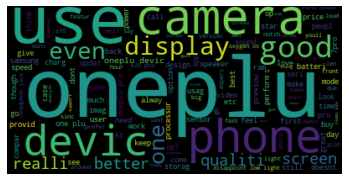

In [14]:

# Plot the wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
allwords = ' '.join([i for i in df['Clean_reviews']])
wordcloud = WordCloud().generate(allwords)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [16]:
# Create a function to compute the negative, neutral and positive

def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutal'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [17]:
df

,Unnamed: 0,Customer Name,Rating,Review Title,User_Review,Clean_reviews,Polarity,Analysis
0,0,Shahzeb,5,Upgraded Beast In Old Package With Everything ...,I will divide my review in four sections first...,divid review four section first person experi ...,0.289833,Positive
1,1,Alfa Xavier,5,Fastest Android device till date!!!,Pros: 1) Best processor - Lightning quick perf...,pro 1 best processor lightn quick perform even...,0.343119,Positive
2,2,Jitendra Kumar,5,The Saviour of the Brand,The Saviour of the BrandIt is a known fact tha...,saviour brandit known fact mani peopl disappoi...,0.146534,Positive
3,3,OneStepUp,5,Felt more of a lateral move than vertical. Goo...,I have been a loyal OP user for many years now...,loyal op user mani year recent upgrad oneplu 6...,0.165329,Positive
4,4,Govinda Dasa,5,The Saviour of the Brand,It is a known fact that many people are disapp...,known fact mani peopl disappoint oneplu 7 pro ...,0.154491,Positive
5,5,Captain Retail,5,An upgraded 6T and downgraded 7 PRO. Flagship ...,The media could not be loa...,media could loaded\n \n\n\n\n i one plu 7 ult...,0.241429,Positive
6,6,Brendon Fernandes,5,Faster than light! (Update after one year),As someone who's admired the OnePlus series of...,someon who admir oneplu seri phone age ive alw...,0.188343,Positive
7,7,Bhushan,5,Should you Buy OnePlus 7 or wait for Redmi K20...,"Bought OnePlus 7 (8 GB variant) in first sale,...",bought oneplu 7 8 gb variant first sale use 1 ...,0.302899,Positive
8,8,Ganesh Hegde,5,Never Settle? Settle for this!,The media could not be loa...,media could loaded\n \n\n\n\n i dont want bor...,0.230405,Positive
9,9,Abhik Banerjee,5,OnePlus 7 review! Real flagship killer!,"Having used this device (OnePlus 7, 6-128 Gb) ...",use devic oneplu 7 6128 gb well month pen thou...,0.220312,Positive
